--- Initial Data Exploration ---
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9011 entries, 1987-05-20 to 2022-11-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   9011 non-null   float64
dtypes: float64(1)
memory usage: 140.8 KB
None

First 5 rows:
            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63

Missing values:
Price    0
dtype: int64


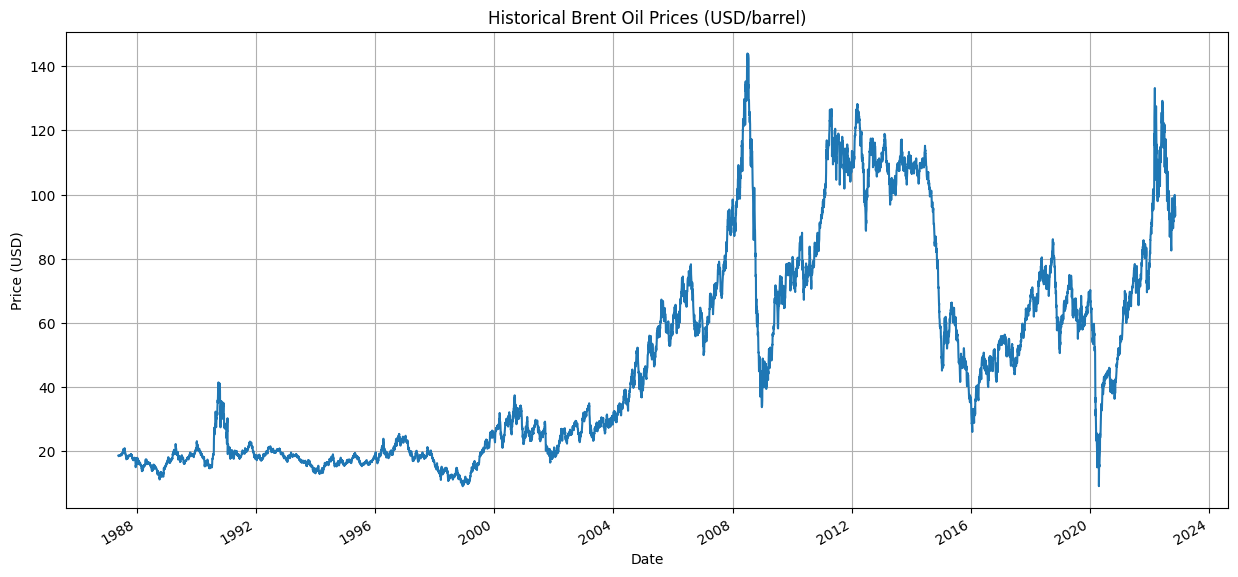


--- Analysis of Time Series Properties ---
The raw price series clearly shows a non-stationary trend, with prices generally increasing over time, punctuated by significant drops (e.g., in 2008 and 2014) and periods of high volatility. This non-stationarity makes it difficult to directly model with many statistical methods. Therefore, we will transform the data to log returns, which are often more stationary, for our change point analysis. This transformation is better for detecting changes in volatility rather than just the price level itself.


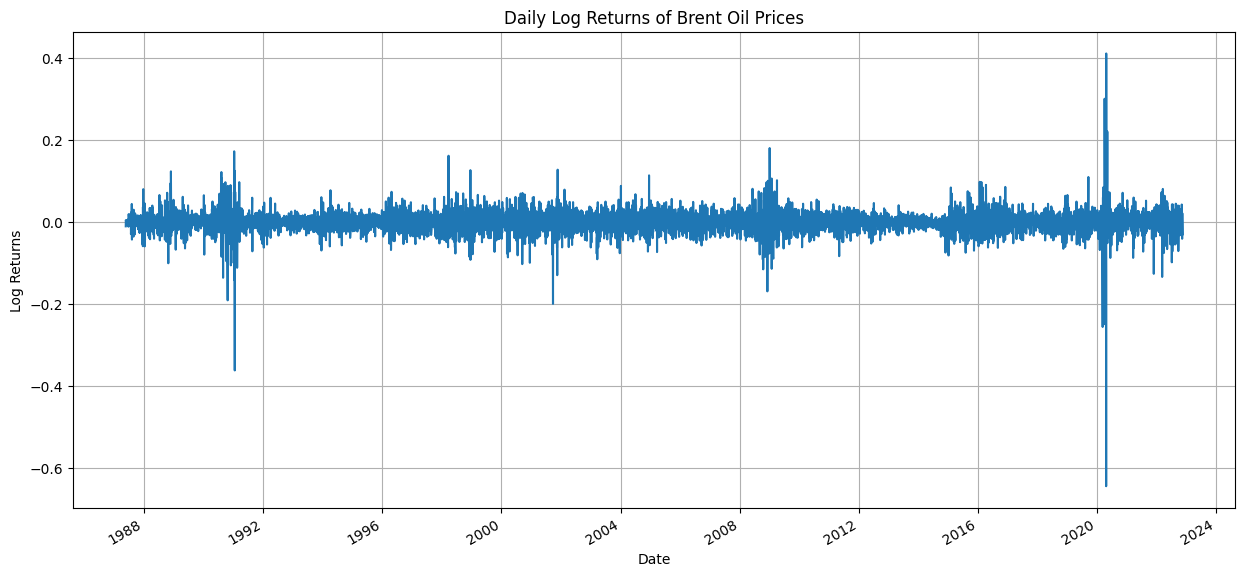


Log returns appear more stationary, centered around zero, but still exhibit clear periods of high volatility (volatility clustering). This suggests that a change point model focused on detecting changes in variance would be highly effective.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Defining the Data Analysis Workflow (Comments) ---
# The workflow is described in the markdown document. This script implements
# the initial data ingestion and exploration steps.

def load_data(file_path):
    """
    Loads Brent oil price data from a CSV file,
    parses the date, and sets it as the index.
    """
    try:
        df = pd.read_csv(file_path)
        df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
        df.set_index('Date', inplace=True)
        df.sort_index(inplace=True)
        return df
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def analyze_time_series_properties(df):
    """
    Analyzes and visualizes the time series properties.
    Discusses trend and stationarity.
    """
    if df is None:
        return

    print("--- Initial Data Exploration ---")
    print("DataFrame Info:")
    print(df.info())
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nMissing values:")
    print(df.isnull().sum())

    # Plot the raw price series to check for trend and volatility
    plt.figure(figsize=(15, 7))
    df['Price'].plot(title='Historical Brent Oil Prices (USD/barrel)')
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)
    plt.show()

    print("\n--- Analysis of Time Series Properties ---")
    print("The raw price series clearly shows a non-stationary trend, with prices generally increasing over time, punctuated by significant drops (e.g., in 2008 and 2014) and periods of high volatility. This non-stationarity makes it difficult to directly model with many statistical methods. Therefore, we will transform the data to log returns, which are often more stationary, for our change point analysis. This transformation is better for detecting changes in volatility rather than just the price level itself.")

    # Calculate log returns
    df['Log_Returns'] = np.log(df['Price'] / df['Price'].shift(1))
    df.dropna(inplace=True)

    # Plot the log returns to check for stationarity and volatility clustering
    plt.figure(figsize=(15, 7))
    df['Log_Returns'].plot(title='Daily Log Returns of Brent Oil Prices')
    plt.xlabel("Date")
    plt.ylabel("Log Returns")
    plt.grid(True)
    plt.show()

    print("\nLog returns appear more stationary, centered around zero, but still exhibit clear periods of high volatility (volatility clustering). This suggests that a change point model focused on detecting changes in variance would be highly effective.")

# --- Main execution block for Task 1, Part 1 ---
if __name__ == "__main__":
    file_path = '../data/raw/BrentOilPrices.csv'  # Replace with the actual file path
    brent_data = load_data(file_path)
    if brent_data is not None:
        analyze_time_series_properties(brent_data)

In [13]:

# --- 2. Research and Compile Event Data ---
def compile_event_data():
    """
    Compiles a structured dataset of key geopolitical and economic events.
    """
    events = [
        {'date': '2014-06-01', 'type': 'OPEC Policy', 'description': 'OPEC maintains production levels despite rising US shale oil, leading to a major price collapse.'},
        {'date': '2016-01-20', 'type': 'Market Shock', 'description': 'Brent crude prices hit a 12-year low below $30 per barrel due to a global supply glut.'},
        {'date': '2016-12-01', 'type': 'OPEC+ Agreement', 'description': 'OPEC and non-OPEC producers agree on joint production cuts to stabilize prices.'},
        {'date': '2018-05-08', 'type': 'Political Decision', 'description': 'U.S. withdraws from the Iran nuclear deal and reimposes sanctions.'},
        {'date': '2020-03-01', 'type': 'Economic Shock / Conflict', 'description': 'COVID-19 pandemic and a Saudi-Russia price war cause a historic price crash.'},
        {'date': '2020-04-12', 'type': 'OPEC+ Agreement', 'description': 'OPEC+ agrees to a historic production cut to stabilize the market amidst the pandemic.'},
        {'date': '2022-02-24', 'type': 'Conflict', 'description': 'Russian invasion of Ukraine sends oil prices soaring due to supply fears.'},
        {'date': '2022-07-01', 'type': 'Economic Policy', 'description': 'Aggressive central bank rate hikes fuel recession fears, putting downward pressure on prices.'},
        {'date': '2012-12-01', 'type': 'Political Decision', 'description': 'Tightening of sanctions on Iranian oil exports by the EU and US.'},
        {'date': '2013-05-01', 'type': 'Geopolitical Conflict', 'description': 'Increasing instability in Libya disrupts oil production and exports.'},
        {'date': '2014-06-01', 'type': 'Geopolitical Conflict', 'description': 'The rise of ISIS and conflict in Iraq destabilizes a key oil-producing region.'},
    ]
    event_df = pd.DataFrame(events)
    event_df['date'] = pd.to_datetime(event_df['date'])
    return event_df

# --- 3. Identify and State Assumptions and Limitations ---
def document_assumptions_and_limitations():
    """
    This function outputs the assumptions and limitations as text.
    """
    print("--- Assumptions and Limitations of the Analysis ---")
    print("\n**Assumptions:**")
    print("- The provided Brent oil price data is a reliable and accurate representation of the market.")
    print("- The compiled list of events is a fair representation of the major drivers of structural change.")
    print("- The Bayesian change point model is an appropriate tool for this type of time series data.")
    print("\n**Crucial Limitation: Correlation vs. Causation**")
    print("A change point analysis identifies *when* a statistical property of the time series changes. If the date of a detected change point aligns closely with a major geopolitical event, we can infer a strong statistical correlation in time. However, this does not constitute proof of causation. The price change could be influenced by a multitude of other unmeasured factors, such as market speculation, investor sentiment, or other concurrent events. Our goal is to provide a plausible, data-driven narrative that connects significant price shifts to major events, but this is a hypothesis, not a definitive causal proof.")

# --- Main execution block for Task 1, Part 2 ---
if __name__ == "__main__":
    event_data = compile_event_data()
    print("--- Compiled Event Data ---")
    print(event_data)
    
    print("\n" + "="*50 + "\n")
    document_assumptions_and_limitations()

--- Compiled Event Data ---
         date                       type  \
0  2014-06-01                OPEC Policy   
1  2016-01-20               Market Shock   
2  2016-12-01            OPEC+ Agreement   
3  2018-05-08         Political Decision   
4  2020-03-01  Economic Shock / Conflict   
5  2020-04-12            OPEC+ Agreement   
6  2022-02-24                   Conflict   
7  2022-07-01            Economic Policy   
8  2012-12-01         Political Decision   
9  2013-05-01      Geopolitical Conflict   
10 2014-06-01      Geopolitical Conflict   

                                          description  
0   OPEC maintains production levels despite risin...  
1   Brent crude prices hit a 12-year low below $30...  
2   OPEC and non-OPEC producers agree on joint pro...  
3   U.S. withdraws from the Iran nuclear deal and ...  
4   COVID-19 pandemic and a Saudi-Russia price war...  
5   OPEC+ agrees to a historic production cut to s...  
6   Russian invasion of Ukraine sends oil prices s.

In [14]:
# --- 4. Model and Data Understanding (Conceptual) ---
def explain_model_concepts():
    """
    Provides a conceptual explanation of the model and its purpose.
    """
    print("--- Understanding the Model and Data ---")
    print("\n**Purpose of Change Point Models:**")
    print("Change point models are statistical tools used to detect abrupt, permanent shifts in the behavior of a time series. In our context, they will help us find moments where the Brent oil price market underwent a significant structural break, such as a change in its average price level or its volatility. This helps us move beyond simple visual inspection to a rigorous, probabilistic identification of key historical moments.")

    print("\n**Expected Outputs of a Change Point Analysis:**")
    print("1. **Posterior Probability Distribution of Change Points:** The model will not give a single, certain date but a distribution of probabilities over all possible dates. A sharp peak in this distribution indicates high confidence in a particular change point date.")
    print("2. **Parameter Values for Each Segment:** For each segment of the time series separated by a change point, the model will provide the estimated parameters of the data's distribution (e.g., mean and standard deviation of log returns). We can compare these values to quantify the impact of the change.")

    print("\n**Limitations of the Analysis Output:**")
    print("The outputs are statistical in nature. The model does not know about political conflicts or OPEC decisions. It only knows that the data's statistical properties changed on a certain date. The task of linking this statistical output to real-world events and building a compelling narrative remains the responsibility of the analyst.")

# --- 5. Main Media Channels for Communication ---
def determine_communication_channels():
    """
    This function outlines the main communication strategy.
    """
    print("\n--- Communication Channels and Formats ---")
    print("The key stakeholders (investors, policymakers, energy companies) require different levels of detail and interactivity.")
    print("\n1. **Interactive Dashboard (Flask & React):**")
    print("   - **Audience:** All stakeholders.")
    print("   - **Format:** An intuitive web application.")
    print("   - **Purpose:** To provide a self-service tool for exploring data, visualizing historical trends, highlighting detected change points, and associating them with specific events. Users can filter by date ranges and event types.")
    
    print("\n2. **PDF Report / Blog Post:**")
    print("   - **Audience:** Policymakers and executives.")
    print("   - **Format:** A 1-2 page executive summary or a detailed blog post.")
    print("   - **Purpose:** To present the key findings, methodology, assumptions, and actionable insights in a narrative format. This provides the context that the dashboard may not fully capture.")
    
    print("\n3. **GitHub Repository:**")
    print("   - **Audience:** Technical stakeholders and for transparency.")
    print("   - **Format:** A public repository with all code, data, and documentation.")
    print("   - **Purpose:** To ensure reproducibility, allow for peer review, and provide a detailed record of the project's development.")

# --- Main execution block for Task 1, Part 3 ---
if __name__ == "__main__":
    explain_model_concepts()
    determine_communication_channels()

--- Understanding the Model and Data ---

**Purpose of Change Point Models:**
Change point models are statistical tools used to detect abrupt, permanent shifts in the behavior of a time series. In our context, they will help us find moments where the Brent oil price market underwent a significant structural break, such as a change in its average price level or its volatility. This helps us move beyond simple visual inspection to a rigorous, probabilistic identification of key historical moments.

**Expected Outputs of a Change Point Analysis:**
1. **Posterior Probability Distribution of Change Points:** The model will not give a single, certain date but a distribution of probabilities over all possible dates. A sharp peak in this distribution indicates high confidence in a particular change point date.
2. **Parameter Values for Each Segment:** For each segment of the time series separated by a change point, the model will provide the estimated parameters of the data's distribution (e.g